<h1 style="font-size: 300%">Traffic data</h1>

In [12]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", sns.__version__)          # 0.12.1

scikit-learn version: 1.3.0
pandas version: 2.1.0
seaborn version: 0.12.2


# 📦 Data provisioning
 

In [13]:
df = pd.read_csv("New dataset 2022 - 2023_traffic.csv", sep=";")

# Create a boolean mask for the condition RouteOms == 'A58'
mask = df['RouteOms'] == 'A58'

# Use the boolean mask to select rows where the condition is True
selected_rows = df[mask]

unique_counts = selected_rows["RouteOms"].value_counts()
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36965 entries, 0 to 607163
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NLSitNummer                 36965 non-null  int64 
 1   DatumFileBegin              36965 non-null  object
 2   DatumFileEind               36965 non-null  object
 3   TijdFileBegin               36965 non-null  object
 4   TijdFileEind                36965 non-null  object
 5   FileZwaarte                 36965 non-null  object
 6   GemLengte                   36965 non-null  object
 7   FileDuur                    36965 non-null  object
 8   HectometerKop               36965 non-null  object
 9   HectometerStaart            36965 non-null  object
 10  RouteLet                    36965 non-null  object
 11  RouteNum                    36965 non-null  int64 
 12  RouteOms                    36965 non-null  object
 13  hectometreringsrichting     36965 non-null  object

In [14]:
selected_rows.sample(5)

,NLSitNummer,DatumFileBegin,DatumFileEind,TijdFileBegin,TijdFileEind,FileZwaarte,GemLengte,FileDuur,HectometerKop,HectometerStaart,...,TrajVan,TrajNaar,OorzaakGronddetail,OorzaakVerloop,OorzaakCodeVerloop,OorzaakCode,Oorzaak_1,Oorzaak_2,Oorzaak_3,"Oorzaak_4,,,,,,,,,,,,,,,,,"
23706,2970137,2022-03-31,2022-03-31,9:20:30,9:29:00,"24,228","2850,000","8,500","28,6","31,1",...,Tilburg,Eindhoven,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 8],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,"
383326,3476662,2023-04-11,2023-04-11,7:38:26,7:41:00,"6,273","2444,000","2,567","75,5","77,8",...,Bergen op Zoom,Breda,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 3],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,"
364199,3453001,2023-03-28,2023-03-28,8:22:27,8:38:01,"47,667","3062,000","15,567","74,4","77,2",...,Bergen op Zoom,Breda,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 16],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,"
233475,3265670,2022-11-09,2022-11-09,16:57:29,17:01:00,"8,232","2341,000","3,517","22,4","19,9",...,Eindhoven,Tilburg,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 4],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,"
353790,3438047,2023-03-17,2023-03-17,16:23:28,16:46:02,"68,572","3039,000","22,567","26,7","24,5",...,Eindhoven,Tilburg,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 23],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,"


C:\Users\arthu\AppData\Local\Temp\ipykernel_10936\3379859590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['FileZwaarte'] = features['FileZwaarte'].str.replace(',', '.').astype(float)
C:\Users\arthu\AppData\Local\Temp\ipykernel_10936\3379859590.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['GemLengte'] = features['GemLengte'].str.replace(',', '.').astype(float)
C:\Users\arthu\AppData\Local\Temp\ipykernel_10936\3379859590.py:7: SettingWithCopyWarning: 
A value is trying to be se

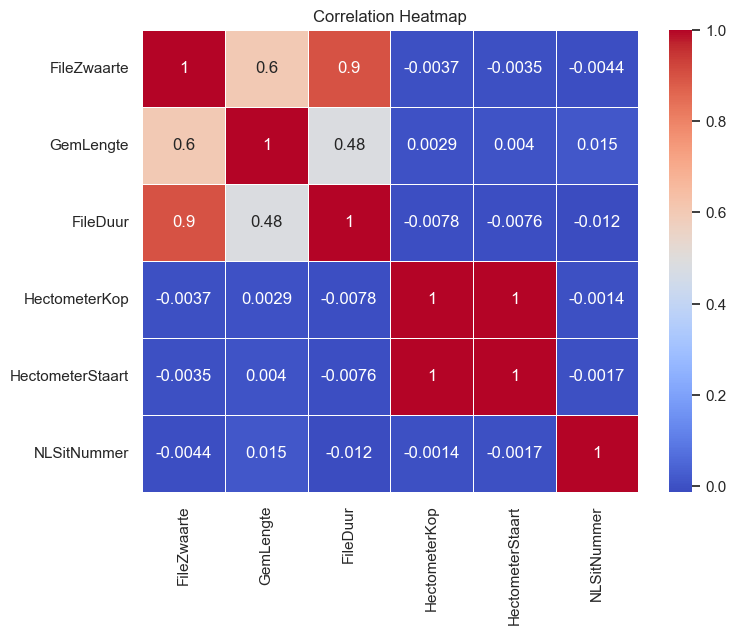

In [15]:
features = df[['FileZwaarte', 'GemLengte', 'FileDuur', 'HectometerKop', 'HectometerStaart', 'NLSitNummer']]

# Replace commas with periods and convert to float
# Replace commas with periods and convert to float for the specified columns
features['FileZwaarte'] = features['FileZwaarte'].str.replace(',', '.').astype(float)
features['GemLengte'] = features['GemLengte'].str.replace(',', '.').astype(float)
features['FileDuur'] = features['FileDuur'].str.replace(',', '.').astype(float)
features['HectometerKop'] = features['HectometerKop'].str.replace(',', '.').astype(float)
features['HectometerStaart'] = features['HectometerStaart'].str.replace(',', '.').astype(float)

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Create and display the heatmap
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<h1 style="font-size: 300%">Weather data</h1>

In [18]:
df = pd.read_csv("new_dataset_2021-2030_weather.csv", sep=",")
df.info()

df.columns = df.columns.str.strip()

print(df.columns)


features = df[['HH', 'DD', 'FH', 'FF', 'T', 'TD', 'DR', 'VV', 'N', 'WW', 'M', 'R', 'S', 'O', 'Y']]

pd.set_option('display.max_colwidth', None)

# Replace whitespace values with NaN for specific columns
whitespace_values = [' ', '  ', '   ','     ', '     ']  # Add more variations if needed
columns_to_clean = ['HH', 'DD', 'FH', 'FF', 'T', 'TD', 'DR', 'VV', 'N', 'WW', 'M', 'R', 'S', 'O', 'Y']  # Add more columns as needed

all_unique = []

for col in columns_to_clean:
    # Replace non-numeric values (including NaN) with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Now, you can safely convert to integers
    df[col] = df[col].astype('Int64')  # Use 'Int64' to handle NaN with integers


C:\Users\arthu\AppData\Local\Temp\ipykernel_10936\2175204653.py:1: DtypeWarning: Columns (15,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("new_dataset_2021-2030_weather.csv", sep=",")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49681 entries, 0 to 49680
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   # STN     49680 non-null  float64
 1   YYYYMMDD  49680 non-null  float64
 2      HH     49680 non-null  float64
 3      DD     49680 non-null  float64
 4      FH     49680 non-null  float64
 5      FF     49680 non-null  float64
 6      FX     49680 non-null  float64
 7       T     49680 non-null  float64
 8    T10N     49680 non-null  object 
 9      TD     49680 non-null  float64
 10     SQ     49680 non-null  float64
 11      Q     49680 non-null  float64
 12     DR     49680 non-null  float64
 13     RH     49680 non-null  float64
 14      P     49680 non-null  float64
 15     VV     49680 non-null  object 
 16      N     49680 non-null  object 
 17      U     49680 non-null  float64
 18     WW     49680 non-null  object 
 19     IX     49680 non-null  float64
 20      M     49680 non-null  ob

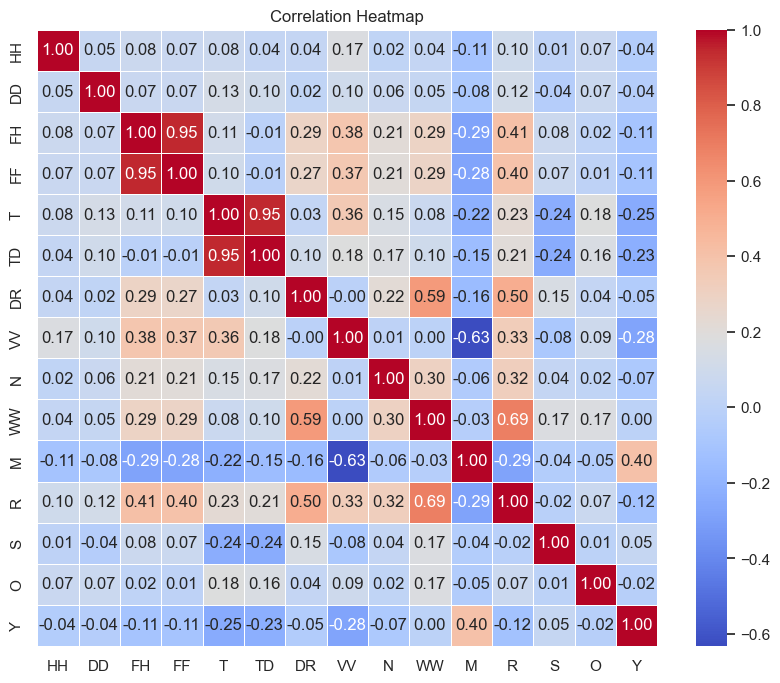

In [21]:
# Step 1: Replace or remove non-numeric values
features = features.replace(' ', np.nan)  # Replace whitespace with NaN
features = features.dropna()  # Remove rows with NaN values

# Step 2: Convert the data to numeric data types
features = features.apply(pd.to_numeric, errors='coerce')

# Now you can calculate the correlation matrix
correlation_matrix = features.corr()

# Create and display the larger heatmap with two decimal places
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))  # Adjust the figsize to your desired dimensions
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()